### Retail Data EDA

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("VS Code + venv + Jupyter is working!")


VS Code + venv + Jupyter is working!


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("VS Code + venv + Jupyter is working!")


VS Code + venv + Jupyter is working!


In [17]:
df = pd.read_csv('../data/raw/retail_store_inventory_data.csv')

df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [19]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [20]:
df["Date"] = pd.to_datetime(df["Date"])     # Convert 'Date' column to datetime format

In [21]:
df = df.sort_values("Date")   # Sort the DataFrame by date

In [22]:
df.isnull().sum() # Check for missing values

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [23]:
#df = df.dropna(subset=["Date","Units Sold"]) # Drop rows with missing 'Date' or 'Units Sold'

In [24]:
df = df[df["Units Sold"] >= 0] # Remove rows with negative 'Units Sold' values

In [26]:
df[df["Date"] == df["Date"].min()]
daily_demand.head()

,Date,Units Sold
0,2022-01-01,14484
1,2022-01-02,13415
2,2022-01-03,13681
3,2022-01-04,14084
4,2022-01-05,12572


## Visualize demand

Demand Definition

In this analysis, customer demand is proxied using total units sold per day,
aggregated across all stores. This provides a consistent time series suitable
for trend analysis and forecasting.


In [65]:
df.head()

,date,store_id,product_id,category,region,inventory_level,units_sold,units_ordered,demand_forecast,price,discount,weather_condition,holiday_promotion,competitor_pricing,seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
72,2022-01-01,S004,P0013,Furniture,East,191,56,65,54.47,61.81,0,Sunny,0,63.92,Autumn
71,2022-01-01,S004,P0012,Electronics,North,349,9,165,0.95,14.25,5,Rainy,1,18.56,Spring
70,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,0,Sunny,1,57.76,Spring
69,2022-01-01,S004,P0010,Groceries,East,447,104,96,115.03,33.48,15,Cloudy,0,37.15,Summer


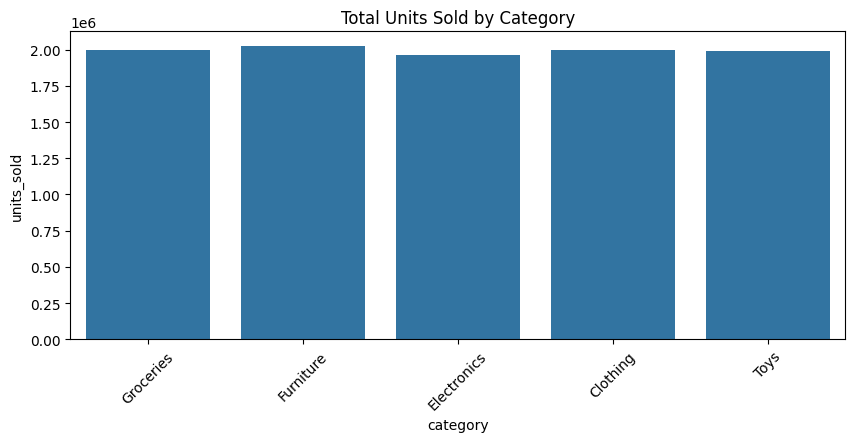

In [66]:
import seaborn as sns

# Which categories drive the most demand?
# Visualizing total units sold by category
plt.figure(figsize=(10,4))
sns.barplot(
    data=df,
    x="category",
    y="units_sold",
    estimator=sum,
    errorbar=None
)
plt.title("Total Units Sold by Category")
plt.xticks(rotation=45)
plt.show()


Boxplots shows typical demand, spread, outliers 

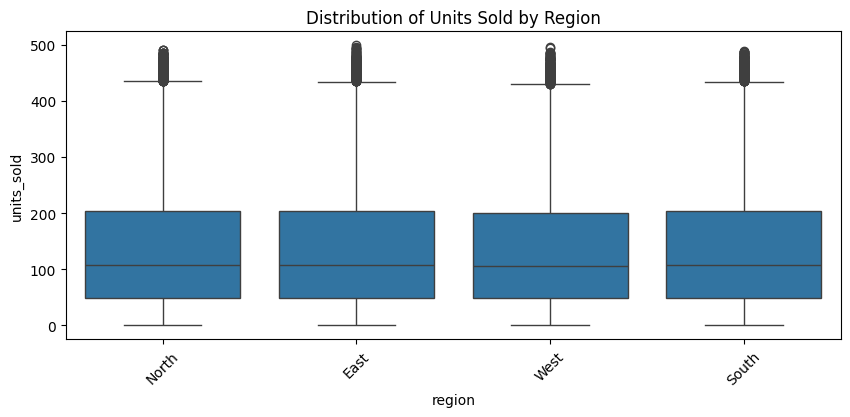

In [ ]:
# How does demand vary across different regions?
# Visualizing distribution of units sold by region


plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    x="region",
    y="units_sold"
)
plt.title("Distribution of Units Sold by Region")
plt.xticks(rotation=45)
plt.show()

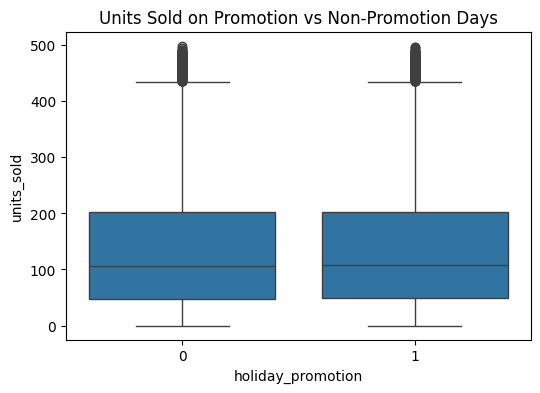

In [ ]:
# Does running promotions on holidays impact sales?
# Visualizing units sold on promotion vs non-promotion days

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="holiday_promotion",
    y="units_sold"
)
plt.title("Units Sold on Promotion vs Non-Promotion Days")
plt.show()


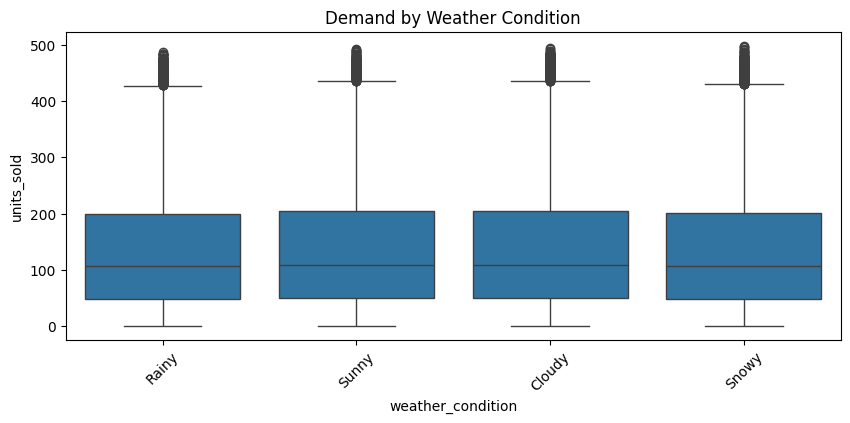

In [ ]:
# How does weather impact demand?
# Visualizing demand by weather condition

plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    x="weather_condition",
    y="units_sold"
)
plt.title("Demand by Weather Condition")
plt.xticks(rotation=45)
plt.show()


In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(
    data=df,
    x="weather_condition",
    y="units_sold"
)
plt.title("Demand by Weather Condition")
plt.xticks(rotation=45)
plt.show()

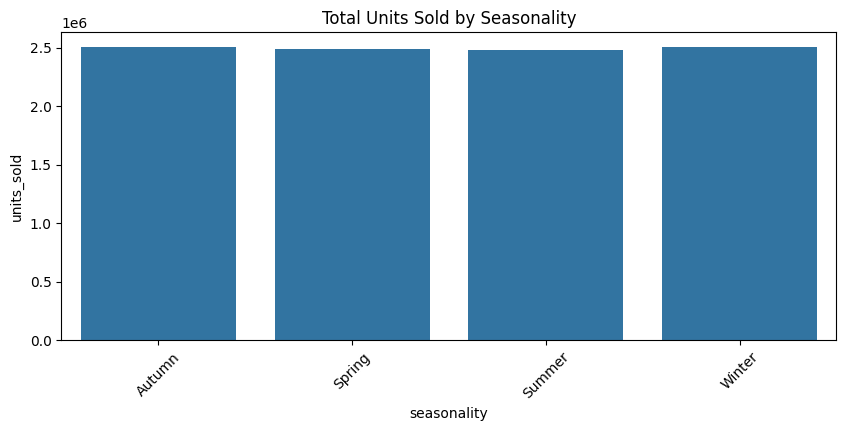

In [ ]:
# How does seasonality affect demand?
# Visualizing total units sold by seasonality

plt.figure(figsize=(10,4))
sns.barplot(
    data=df,
    x="seasonality",
    y="units_sold",
    estimator=sum,
    errorbar=None
)
plt.title("Total Units Sold by Seasonality")
plt.xticks(rotation=45)
plt.show()


Because the data contains multiple records per day across stores, I am aggregating it to a daily time series by summing units sold per date, which creates a clean demand signal suitable for forecasting.

In [76]:
daily_demand = df.groupby("date")["units_sold"].sum().reset_index() # Aggregate daily demand
daily_demand.head()

,date,units_sold
0,2022-01-01,14484
1,2022-01-02,13415
2,2022-01-03,13681
3,2022-01-04,14084
4,2022-01-05,12572


In [ ]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [ ]:
print(df.columns.tolist())


['date', 'store_id', 'product_id', 'category', 'region', 'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast', 'price', 'discount', 'weather_condition', 'holiday_promotion', 'competitor_pricing', 'seasonality']


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())


['date', 'store_id', 'product_id', 'category', 'region', 'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast', 'price', 'discount', 'weather_condition', 'holiday_promotion', 'competitor_pricing', 'seasonality']


In [ ]:
[c for c in df.columns if "date" in c.lower()]
df.columns

Index(['date', 'store_id', 'product_id', 'category', 'region',
       'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast',
       'price', 'discount', 'weather_condition', 'holiday_promotion',
       'competitor_pricing', 'seasonality'],
      dtype='object')

In [ ]:
daily_demand = (
    df.groupby('date')['units_sold']
      .sum()
      .reset_index()
      .sort_values('date')
)

daily_demand.head() # Display the first few rows of daily_demand


,date,units_sold
0,2022-01-01,14484
1,2022-01-02,13415
2,2022-01-03,13681
3,2022-01-04,14084
4,2022-01-05,12572
